# Principal Components Analysis

## Import Libraries

In [1]:
# Import Libraries
import numpy as np
from pylearn_ml191.dimentional_reduction import PCA

from sklearn.decomposition import PCA as Sklearn_PCA
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
from matplotlib import lines
%matplotlib inline

# Fixed random seed 
np.random.seed(21)

# Ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

## 1. Data Generation

In [2]:
def true_model(x):
    return x - 2

In [3]:
N = 10
x_min = 0
x_max = 2

norm_mu = 0
norm_scale = 1

x = np.random.uniform(x_min, x_max, N)
noise = np.random.normal(norm_mu, norm_scale, N)
y = (true_model(x) + noise)

x = np.reshape(x, (N, 1))
y = np.reshape(y, (N, 1))

X = np.concatenate([x, y], axis=1)

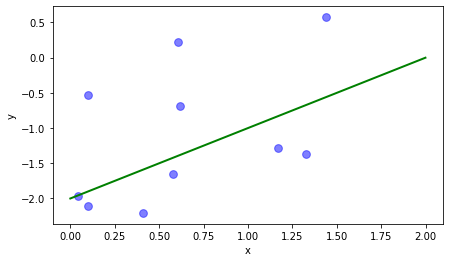

In [4]:
# For plot true model 
step_size = 0.001
x_plot = np.arange(x_min, x_max, step_size)
y_true_plot = true_model(x_plot)

plt.figure(figsize=(7,4))
plt.scatter(X[:, 0], X[:,1], s=60, c='blue', alpha=0.5)
plt.plot(x_plot, y_true_plot, linewidth=2, c ='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
# Some helper functions
def project(X, u):
    def project_vec(x, u):
        return u * (x @ u) / (u @ u) 
    u = u.reshape((-1,))
    Z = np.zeros(X.shape)
    for i, x in enumerate(X):
        z = project_vec(x, u)
        Z[i] = z
    return Z

## 2. Principal Component Analysis

In [6]:
# Visualization 
step_size = 0.001
x_plot = np.arange(x_min, x_max, step_size)
y_true_plot = true_model(x_plot)

pca = PCA(n_components = 1)
Y = pca.fit_transform(X)
X_retrival = pca.inverse_transform(Y)
print("===================================================")
print("Nghiệm do thư viện tự hiện thực (pylearn_ml191): ")
print(pca.U)
print("---------------------------------------------------")
sPCA = Sklearn_PCA(n_components=1)
sPCA.fit(X)
print("Nghiệm của PCA trong sklearn: ")
print(sPCA.components_)
print("===================================================")

Nghiệm do thư viện tự hiện thực (pylearn_ml191): 
[[-0.29442484 -0.95567464]]
---------------------------------------------------
Nghiệm của PCA trong sklearn: 
[[0.29442484 0.95567464]]


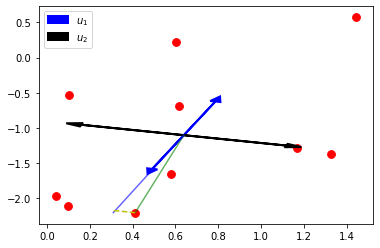

In [7]:
custom_point = 4
ori = X[custom_point]
new = X_retrival[custom_point]

pca = PCA(n_components=2)
pca.fit(X)
vecs = pca.U
mean = pca.mean

plt.scatter(X[:, 0], X[:,1], s=60, c='r', alpha=1)
plt.plot([ori[0], mean[0]], [ori[1], mean[1]] , 'g', alpha=0.6)
plt.plot([new[0], mean[0]], [ori[1], mean[1]] , 'b', alpha=0.6)
plt.plot([ori[0], new[0]], [ori[1], new[1]] , 'y--')

u1, u2 = vecs
u1_vec = plt.arrow(*mean, u1[0]*0.5, u1[1]*0.5, head_width=0.05, linewidth=2, color='b', label="u1")
plt.arrow(*mean, - u1[0]*0.5, - u1[1]*0.5, head_width=0.05, linewidth=2, color='b', label="u1")
u2_vec = plt.arrow(*mean, u2[0] * 0.5, u2[1] * 0.5, head_width=0.05, linewidth=2, color='black', label="u2")
plt.arrow(*mean, - u2[0]*0.5, - u2[1]*0.5, head_width=0.05, linewidth=2, color='black', label="u2")
plt.legend([u1_vec, u2_vec,], ['$u_{1}$', '$u_{2}$']);
plt.show()

## 3. Using PCA with IRIS dataset

### 3.1 Loading IRIS Dataset

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

PCA from pylearn_ml191: 
10 samples from X_new: 
---------------------
[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]]
---------------------


<Figure size 432x288 with 0 Axes>

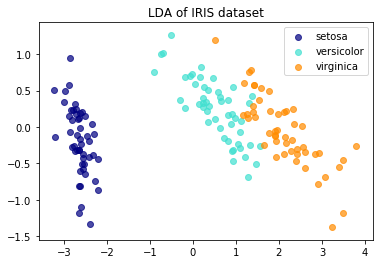

In [9]:
print("PCA from pylearn_ml191: ")
print("=======================")

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

print("10 samples from X_new: ")
print("---------------------")
print(X_new[:10, :])
print("---------------------")

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_new[y == i, 0], X_new[y == i, 1], alpha=.7, c=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

PCA from sklearn: 
10 samples from X_new: 
---------------------
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]
---------------------


<Figure size 432x288 with 0 Axes>

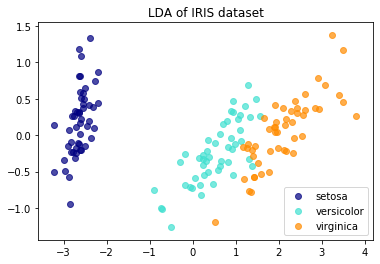

In [10]:
print("PCA from sklearn: ")
print("=======================")

sklearn_pca = Sklearn_PCA(n_components=2)
X_new = sklearn_pca.fit_transform(X)

print("10 samples from X_new: ")
print("---------------------")
print(X_new[:10, :])
print("---------------------")

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_new[y == i, 0], X_new[y == i, 1], alpha=.7, c=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()